# Transaction Data Exploration

#### Steps
1. Understand column definitions
2. Check for and drop duplicates
3. Refine columns and extract new ones
4. Explore distributions of interesting columns


In [2]:
# Import numpy and pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [3]:
# Read and preview data
trans_data_file = rf'data\QVI_transaction_data.xlsx'
trans_data = pd.read_excel(trans_data_file)
trans_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
# Check for and view duplicates
trans_data[trans_data.duplicated(keep=False)]

# There are no duplicates, but if there was, the following line would drop them
trans_data = trans_data.drop_duplicates()

# Check for NaNs. In this case there are none.
trans_data.isnull().any()

DATE              False
STORE_NBR         False
LYLTY_CARD_NBR    False
TXN_ID            False
PROD_NBR          False
PROD_NAME         False
PROD_QTY          False
TOT_SALES         False
dtype: bool

In [5]:
# Looking at PROD_NAME, we can see that most products appear to have their weight listed in their name.
# This might be useful information that we can extract
print(trans_data['PROD_NAME'].head())

# Extract the weight
extr = trans_data['PROD_NAME'].str.extract(r'(\d{1,4}g)', expand=False, flags=re.IGNORECASE)
# Remove g from weight
extr = extr.str.extract(r'(\d{1,4})')
print("\nPreview extraction:\n", extr.head())

# check to see if any row did not have a matching weight string
print("\nIs any extraction null?\n", extr.isnull().any().values)


0      Natural Chip        Compny SeaSalt175g
1                    CCs Nacho Cheese    175g
2      Smiths Crinkle Cut  Chips Chicken 170g
3      Smiths Chip Thinly  S/Cream&Onion 175g
4    Kettle Tortilla ChpsHny&Jlpno Chili 150g
Name: PROD_NAME, dtype: object

Preview extraction:
      0
0  175
1  175
2  170
3  175
4  150

Is any extraction null?
 [False]


In [6]:
# add extracted weight to dataframe
trans_data['WEIGHT'] = extr.astype(np.float32)

# also update the 'DATE' column from Excel's numeric format to a proper date time format.
trans_data['DATE'] = pd.to_datetime(trans_data['DATE'], unit='D', origin=pd.Timestamp('1899-12-30'))

# Preview
print("\nPreview updated dataframe\n", trans_data.head())




Preview updated dataframe
         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  WEIGHT  
0    Natural Chip        Compny SeaSalt175g         2        6.0   175.0  
1                  CCs Nacho Cheese    175g         3        6.3   175.0  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9   170.0  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0   175.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8   150.0  


            min    max  median        mean
PROD_QTY    1.0  200.0     2.0    1.907308
TOT_SALES   1.5  650.0     7.4    7.304205
WEIGHT     70.0  380.0   170.0  182.427017


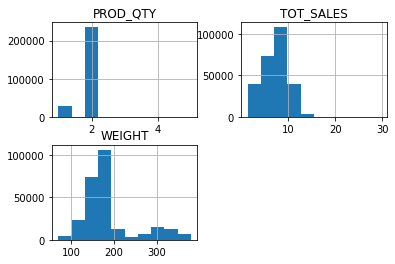

In [14]:
# Looking at the data, there are a few interesting columns.

interesting_cols = ["PROD_QTY", "TOT_SALES", "WEIGHT"]

# first check min, max, median
print(trans_data[interesting_cols].agg(func=['min', 'max', 'median', 'mean'], numeric_only=True).T)
print(trans_data)

# there is one outlier purchase. Drop is and then plot distributions
mod_data = trans_data.drop(trans_data['PROD_QTY'].idxmax())
mod_data = mod_data.drop(mod_data['PROD_QTY'].idxmax())
mod_data.hist(column=interesting_cols)
plt.show()

There are 72637 loyalty members in this data
There are 272 stores in this data


Text(0.5, 1.0, 'Number of transactions per store')

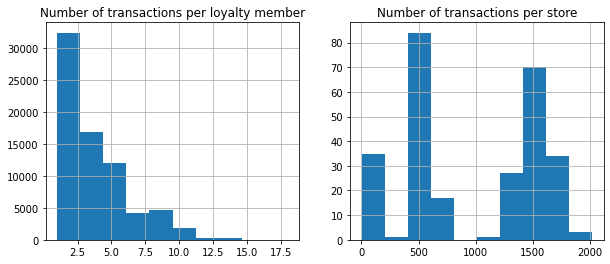

In [32]:
# Next we can look to see how many shoppers and stores there are
print(f"There are {trans_data['LYLTY_CARD_NBR'].value_counts().size} loyalty members in this data")
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
trans_data['LYLTY_CARD_NBR'].value_counts().hist(ax=axs[0])
axs[0].set_title("Number of transactions per loyalty member")

print(f"There are {trans_data['STORE_NBR'].value_counts().size} stores in this data")
trans_data['STORE_NBR'].value_counts().hist(ax=axs[1])
axs[1].set_title("Number of transactions per store")